# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game. 


# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize']=(16,6)
import seaborn as sns

# handling warning 
import warnings
warnings.filterwarnings('ignore')


# Reading the Data

In [5]:
df= pd.read_csv('pubg.csv')

In [7]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9e5fbba13ebe19,1c200aab6dad9b,92db29f073548e,0,0,80.80,0,0,0,58,...,1,0.0000,0,0.00,1,0,1135.00,2,1653,0.4643
1048571,1928469d37a196,e541681c9bf27e,c6e91c362490b8,0,3,184.60,0,0,2,27,...,0,995.0000,0,0.00,0,0,2324.00,9,0,0.9381
1048572,5b2b9abc0f64c2,2161ff6847bf15,beedba7c361349,0,4,181.50,1,0,1,20,...,0,1395.0000,0,0.00,0,0,2153.00,4,1461,0.8400
1048573,91c7c010d76ffd,76cc253f07943d,a7d9c6edf0121f,0,0,100.00,1,1,0,42,...,0,0.0000,0,0.00,0,0,81.39,3,0,0.0370


# Data Descritption

1. **DBNOs** - Number of enemy players knocked.
2. **assists** - Number of enemy players this player damaged that were killed by teammates.
3. **boosts** - Number of boost items used.
4. **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
5. **headshotKills** - Number of enemy players killed with headshots.
6. **heals** - Number of healing items used.
7. **Id** - Player’s Id
8. **killPlace** - Ranking in match of number of enemy players killed.
9. **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
10. **killStreaks** - Max number of enemy players killed in a short amount of time.
11. **kills** - Number of enemy players killed.
12. **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
13. **matchDuration** - Duration of match in seconds.
14. **matchId**  - ID to identify match. There are no matches that are in both the training and testing set.
15. **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
16. **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
17. **revives** - Number of times this player revived teammates.
18. **rideDistance** - Total distance traveled in vehicles measured in meters.
19. **roadKills** - Number of kills while in a vehicle.
20. **swimDistance** - Total distance traveled by swimming measured in meters.
21. **teamKills** - Number of times this player killed a teammate.
22. **vehicleDestroys** - Number of vehicles destroyed.
23. **walkDistance** - Total distance traveled on foot measured in meters.-
24. **weaponsAcquired** - Number of weapons picked up.
25. **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
26. **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
27. **numGroups** - Number of groups we have data for in the match.
28. **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
29. **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

#  Basic Checks

In [10]:
df.shape

(1048575, 29)

In [12]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [14]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1048570,9e5fbba13ebe19,1c200aab6dad9b,92db29f073548e,0,0,80.80,0,0,0,58,...,1,0.0,0,0.0,1,0,1135.00,2,1653,0.4643
1048571,1928469d37a196,e541681c9bf27e,c6e91c362490b8,0,3,184.60,0,0,2,27,...,0,995.0,0,0.0,0,0,2324.00,9,0,0.9381
1048572,5b2b9abc0f64c2,2161ff6847bf15,beedba7c361349,0,4,181.50,1,0,1,20,...,0,1395.0,0,0.0,0,0,2153.00,4,1461,0.8400
1048573,91c7c010d76ffd,76cc253f07943d,a7d9c6edf0121f,0,0,100.00,1,1,0,42,...,0,0.0,0,0.0,0,0,81.39,3,0,0.0370
1048574,42717977f91c26,458dfecb56146b,ecf6908acbd9b2,2,1,99.66,1,1,1,29,...,0,0.0,0,0.0,0,0,2544.00,5,0,0.4074


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1048575 non-null  object 
 1   groupId          1048575 non-null  object 
 2   matchId          1048575 non-null  object 
 3   assists          1048575 non-null  int64  
 4   boosts           1048575 non-null  int64  
 5   damageDealt      1048575 non-null  float64
 6   DBNOs            1048575 non-null  int64  
 7   headshotKills    1048575 non-null  int64  
 8   heals            1048575 non-null  int64  
 9   killPlace        1048575 non-null  int64  
 10  killPoints       1048575 non-null  int64  
 11  kills            1048575 non-null  int64  
 12  killStreaks      1048575 non-null  int64  
 13  longestKill      1048575 non-null  float64
 14  matchDuration    1048575 non-null  int64  
 15  matchType        1048575 non-null  object 
 16  maxPlace         1

In [18]:
df.describe(include='all')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1048575,1048575,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,1048570,831137,47944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5.54E+16,14d6b54cdec6bc,1d4352789627f9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,20,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.331564e-01,1.107765e+00,1.308884e+02,6.586091e-01,2.269671e-01,1.368829e+00,4.760414e+01,...,1.644394e-01,6.073919e+02,3.498081e-03,4.512611e+00,2.397444e-02,7.865913e-03,1.155094e+03,3.660658e+00,6.077752e+02,4.727710e-01
std,NaN,NaN,NaN,5.884064e-01,1.716132e+00,1.713011e+02,1.147117e+00,5.990129e-01,2.676049e+00,2.747391e+01,...,4.705245e-01,1.498646e+03,7.382696e-02,3.048954e+01,1.685196e-01,9.216566e-02,1.184236e+03,2.457831e+00,7.399892e+02,3.075084e-01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.555000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.433000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.861000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.862000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,...,0.000000e+00,4.229500e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.977000e+03,5.000000e+00,1.495000e+03,7.407000e-01


# EDA

# Task 1:- Complete data analysis report on the given data.

# Univariate Analysis

In [24]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights on Univariate Analysis:
 - Univariate analysis focuses on analyzing one variable at a time to understand its distribution, central tendency, variability, and shape. Here are some insights that can be gained through univariate analysis:

**Central Tendency:** - Mean, median, and mode: Univariate analysis helps in calculating these measures to understand the central value around which the data is distributed. Understanding the central tendency provides insights into the typical or average value of the variable. Variability:

**Range:** -  Univariate analysis helps in calculating the range of the variable, which indicates the spread of values from the minimum to the maximum. Standard deviation and variance: These measures quantify the dispersion or variability of the data points around the central tendency. Understanding variability is crucial for assessing the consistency or volatility of the variable.

**Distribution:**
**Histogram:** -  Univariate analysis often involves creating histograms to visualize the distribution of the variable. Skewness and kurtosis: These measures provide insights into the symmetry and shape of the distribution. Understanding the distribution helps in identifying patterns, outliers, and potential data issues. Frequency Analysis:

**Count or frequency:**-  Univariate analysis helps in counting the occurrences of different values or categories within the variable. Mode: Identifying the mode helps in understanding the most frequent value or category within the variable. Frequency analysis provides insights into the prevalence or occurrence of different values or categories. Summary Statistics:

**Quartiles and percentiles:** -  Univariate analysis helps in calculating these statistics to understand the spread of data across different percentiles. Summary statistics provide a concise summary of the variable's characteristics, facilitating easy comparison and interpretation. Outliers Detection:

**Box plots:** -  Univariate analysis involves creating box plots to visualize the distribution of the variable and identify potential outliers. Understanding outliers is important as they may indicate errors in data collection or interesting phenomena worthy of further investigation. Distributions of Categorical Variables:

**Bar charts:** -  Univariate analysis of categorical variables often involves creating bar charts to visualize the frequency distribution of different categories. Understanding the distribution of categorical variables helps in identifying dominant categories and assessing their impact on the analysis. By conducting univariate analysis, analysts can gain valuable insights into individual variables, which serve as the foundation for more advanced multivariate analysis and modeling techniques.

# Bivariate Analysis

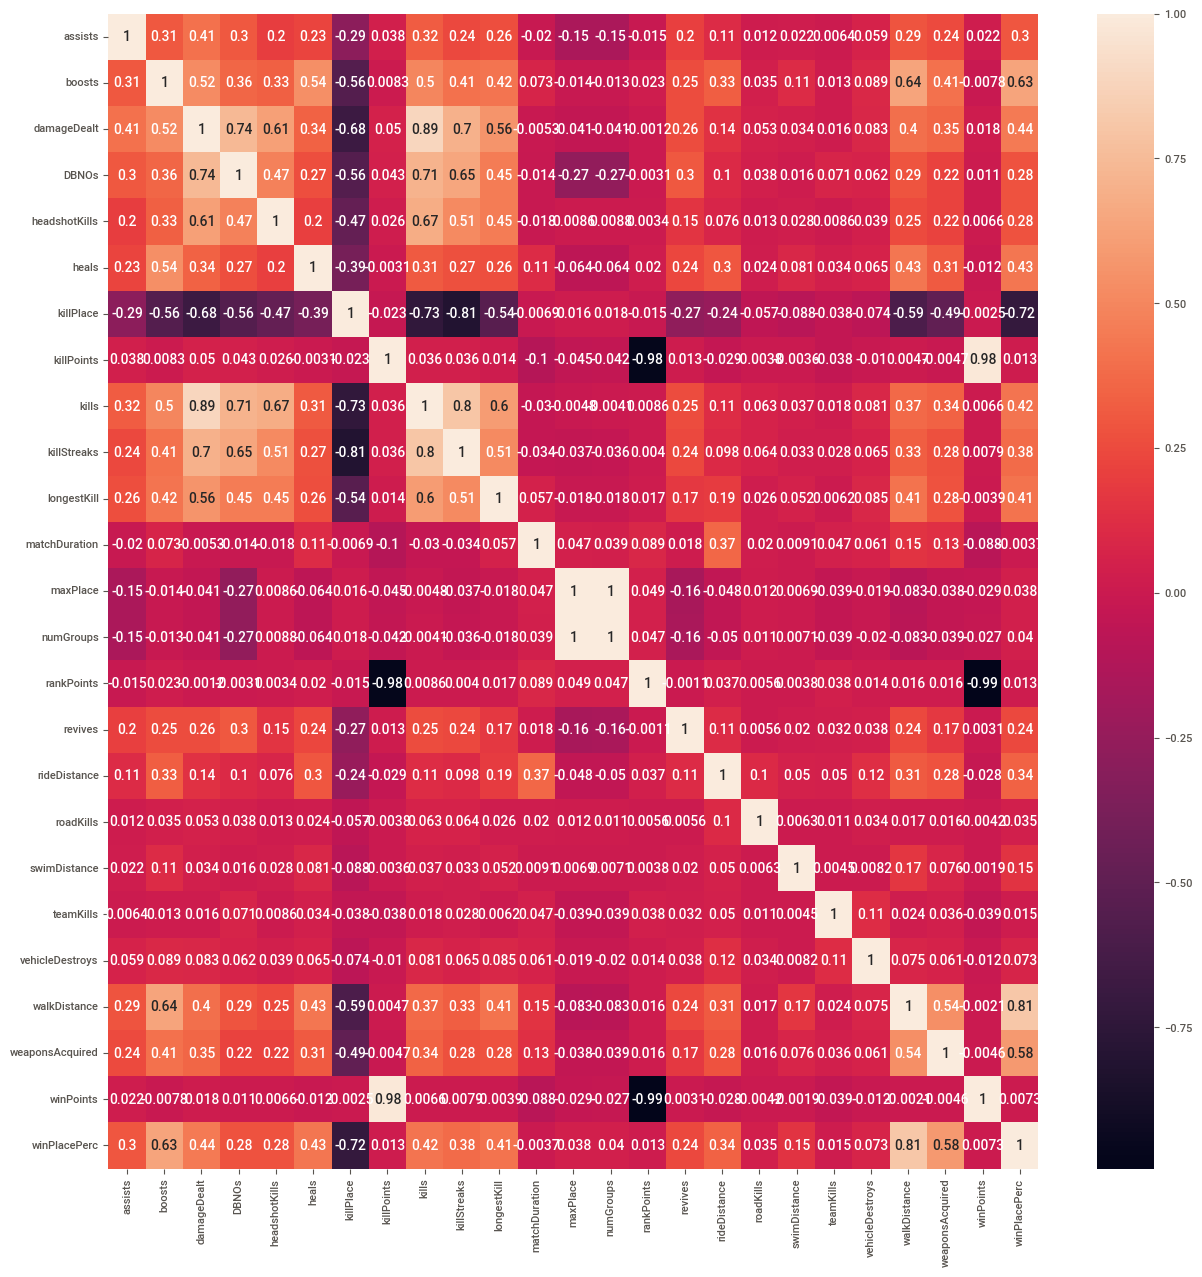

In [30]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=[15,15])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


# Insights on Bivariate Analysis:
- Bivariate analysis involves analyzing the relationship between two variables to understand how they are related to each other. Here are some insights gained through bivariate analysis:

**Correlation Analysis:**
- Pearson correlation coefficient: Bivariate analysis helps in calculating the strength and direction of the linear relationship between two continuous variables. Understanding correlation helps in identifying variables that are positively or negatively associated with each other.

**Heatmaps:** -  Bivariate analysis includes creating heatmaps to visualize the correlation matrix between multiple variables. Heatmaps provide a comprehensive view of the relationships between variables and help in identifying clusters or groups of highly correlated variables. By conducting bivariate analysis, analysts can gain deeper insights into the relationships between variables, which is crucial for understanding patterns, making predictions, and informing decision-making processes.

# Preprocessing

# 1) Check duplicate data

In [36]:
df.duplicated().sum()

0

# 2)Check null values in data

In [39]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [41]:
# check row with null value win place perc
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [43]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# Understanding the Player distribution

In [48]:
df['playerjoined']=df.groupby('matchId')['matchId'].transform('count')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,22
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,27
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,27
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,25
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,21


# Kill Without Moving

In [51]:
df['totaldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killwithoutmoving']=((df['kills']>0) & (df['totaldistance']==0))

**players who travel zero distance yet they have killed enemies seems suspicious, hence removing those rows!!**

In [54]:
df[df['killwithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,14,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,12,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,7,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,17,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,12,0.0,True


In [56]:
df[df['killwithoutmoving']==True].shape

(391, 32)

In [58]:
# drop the table 
df.drop(df[df['killwithoutmoving'] == True].index , inplace = True)

In [60]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving'],
      dtype='object')

**Extra Ordinary Road Kills**

In [65]:
df[df['roadKills']>=5].shape

(24, 32)

In [67]:
df.drop(df[df['roadKills']>=5].index , inplace= True)

**So many kills -How?
In a match a player cannot not kill more that 20 kill**

In [70]:
# data dimension
df[df['kills'] > 20].shape

(98, 32)

In [72]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

# Head Shot

In [75]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

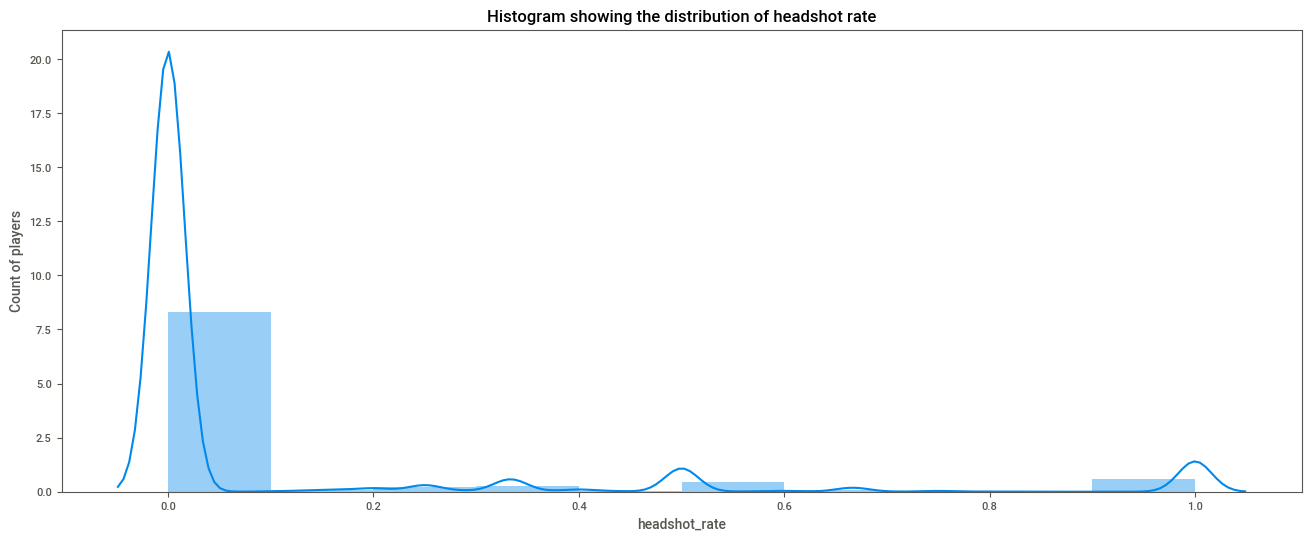

In [77]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [79]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(41, 33)

In [81]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

# Longest Shot

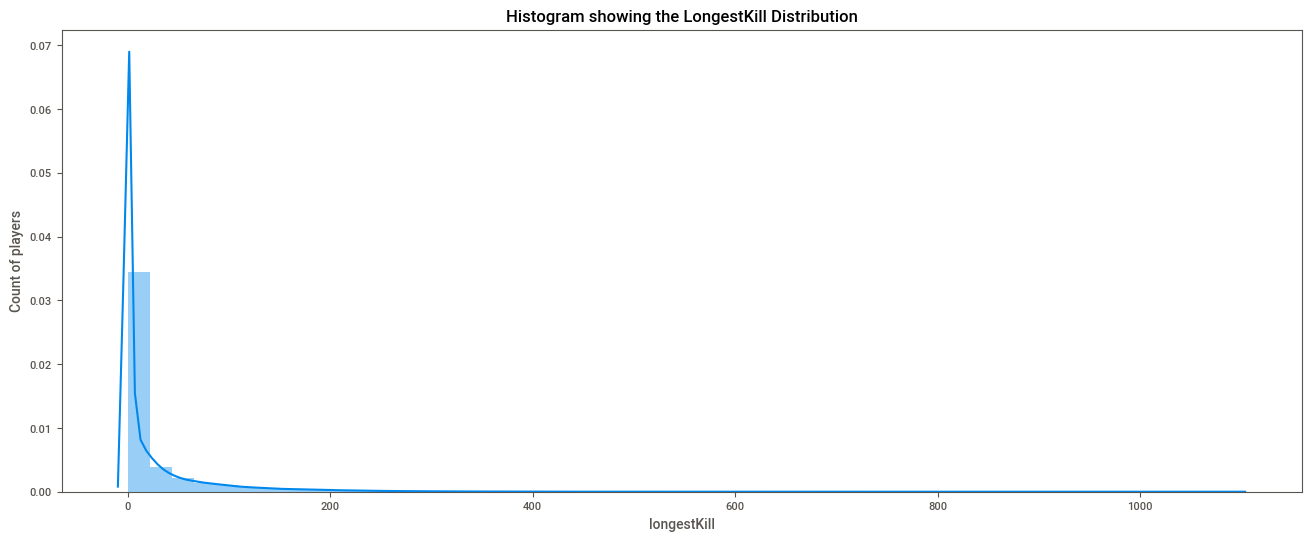

In [84]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

**If a player can kill more than 500m distance it seem suspisious player so we remove those player**

In [87]:
df[df['longestKill']>=500].shape

(404, 33)

In [89]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

# Weapon Change

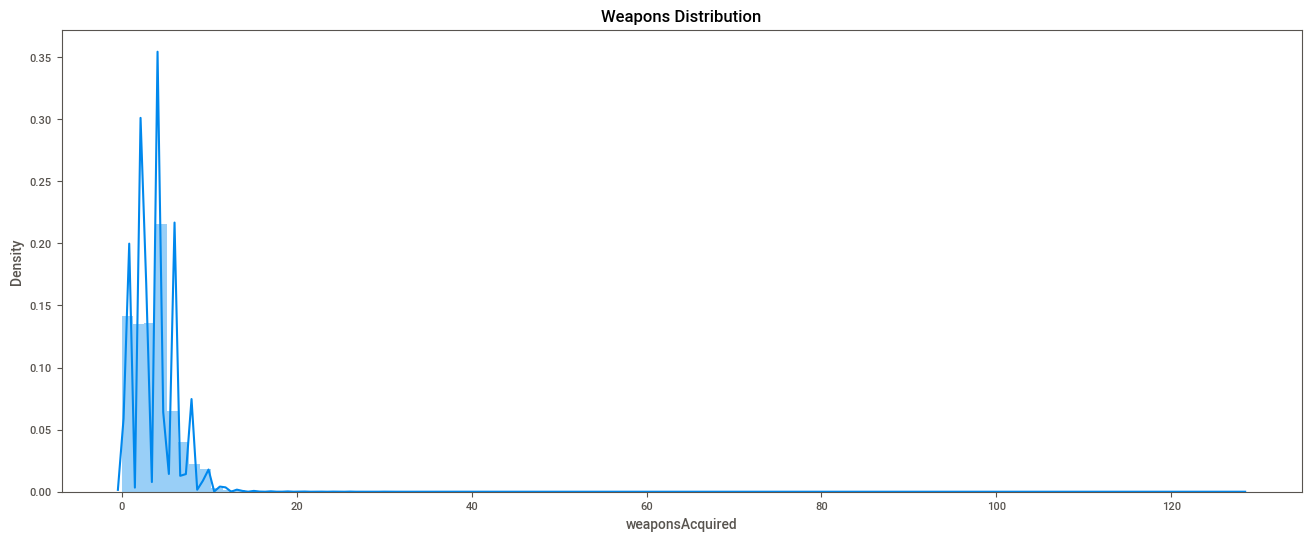

In [94]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [92]:
df[df['weaponsAcquired']>=15].shape

(1630, 33)

In [96]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

# Feature Engineering

In [99]:
normalising_factor = (100 - df['playerjoined']/100)+1

In [103]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [105]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [107]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration','killwithoutmoving'])

In [109]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,22,244.8000,0.0,0.00,0.0000,2821.84,131618.68,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,27,1445.0445,0.0,0.00,9213.7731,2618.98,178997.21,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,27,161.8000,0.0,0.00,6849.6400,5036.50,132762.14,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,25,202.7000,0.0,0.00,3314.6750,3123.25,144677.00,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,21,49.7500,0.0,100.79,10079.0000,9776.63,143524.96,49.7500,0,0


# Handeling Catogorical Data

In [112]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [114]:
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-squad', 'crashtpp',
       'normal-solo', 'normal-duo'], dtype=object)

# Data Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.matchType=lc.fit_transform(data.matchType)

In [119]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,15,26,-1,0,...,22,244.8000,0.0,0.00,0.0000,2821.84,131618.68,244.8000,0,0
1,0,0,57,0,0,0.00,15,25,1484,0,...,27,1445.0445,0.0,0.00,9213.7731,2618.98,178997.21,1445.0445,0,0
2,0,0,47,0,0,0.00,2,47,1491,0,...,27,161.8000,0.0,0.00,6849.6400,5036.50,132762.14,161.8000,0,1
3,0,0,75,0,0,0.00,15,30,1408,0,...,25,202.7000,0.0,0.00,3314.6750,3123.25,144677.00,202.7000,0,0
4,0,0,45,0,1,58.53,13,95,1560,0,...,21,49.7500,0.0,100.79,10079.0000,9776.63,143524.96,49.7500,0,0


# Outliers Handling

Skipping column 'matchType' as it is non-numeric.


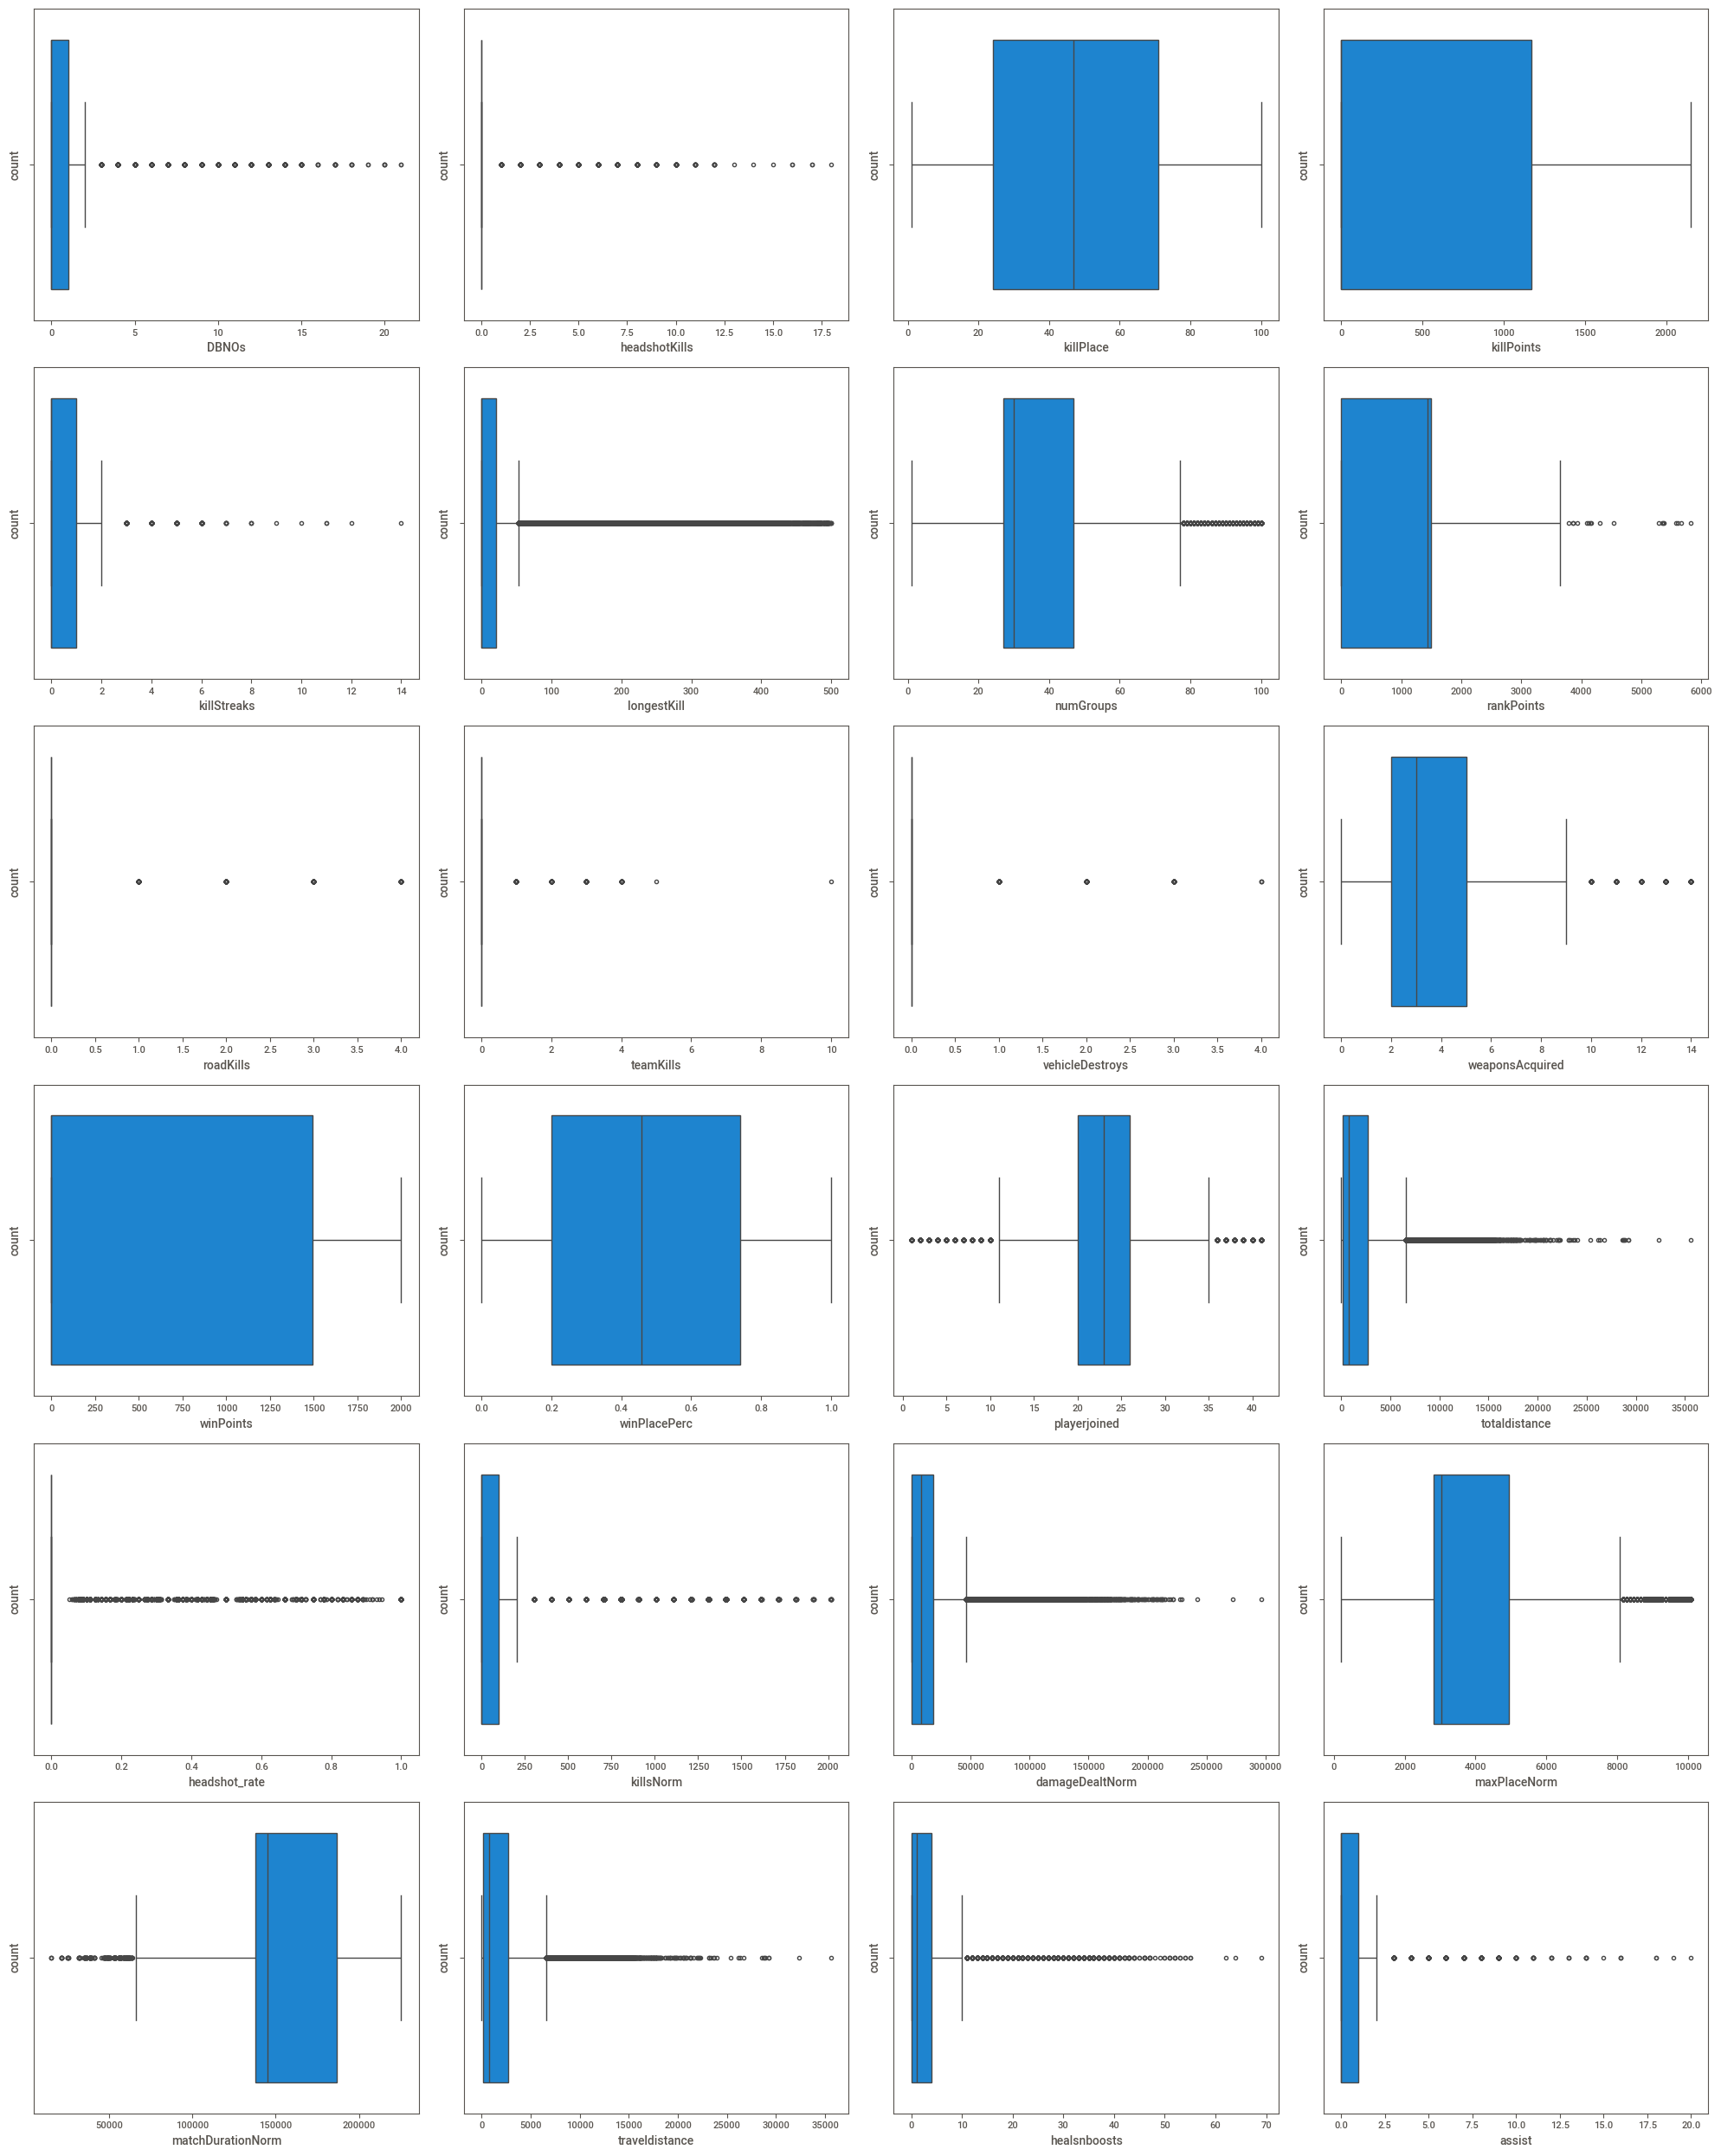

In [122]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 25:
        ax = plt.subplot(6, 4, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

In [124]:
import numpy as np
from scipy import stats

col = 1
for c in data:  # Assuming data is your DataFrame
    if col <= 25:
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        # Double-check if outliers are replaced
        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

DBNOs IQR: 1.0
DBNOs min_limit: -1.5
DBNOs max_limit: 2.5 

Replaced outliers in DBNOs: Series([], Name: DBNOs, dtype: int64) 

headshotKills IQR: 0.0
headshotKills min_limit: 0.0
headshotKills max_limit: 0.0 

Replaced outliers in headshotKills: Series([], Name: headshotKills, dtype: int64) 

killPlace IQR: 47.0
killPlace min_limit: -46.5
killPlace max_limit: 141.5 

Replaced outliers in killPlace: Series([], Name: killPlace, dtype: int64) 

killPoints IQR: 1172.0
killPoints min_limit: -1758.0
killPoints max_limit: 2930.0 

Replaced outliers in killPoints: Series([], Name: killPoints, dtype: int64) 

killStreaks IQR: 1.0
killStreaks min_limit: -1.5
killStreaks max_limit: 2.5 

Replaced outliers in killStreaks: Series([], Name: killStreaks, dtype: int64) 

longestKill IQR: 21.14
longestKill min_limit: -31.71
longestKill max_limit: 52.85 

Replaced outliers in longestKill: Series([], Name: longestKill, dtype: float64) 

matchType IQR: 12.0
matchType min_limit: -15.0
matchType max_limit:

Skipping column 'matchType' as it is non-numeric.


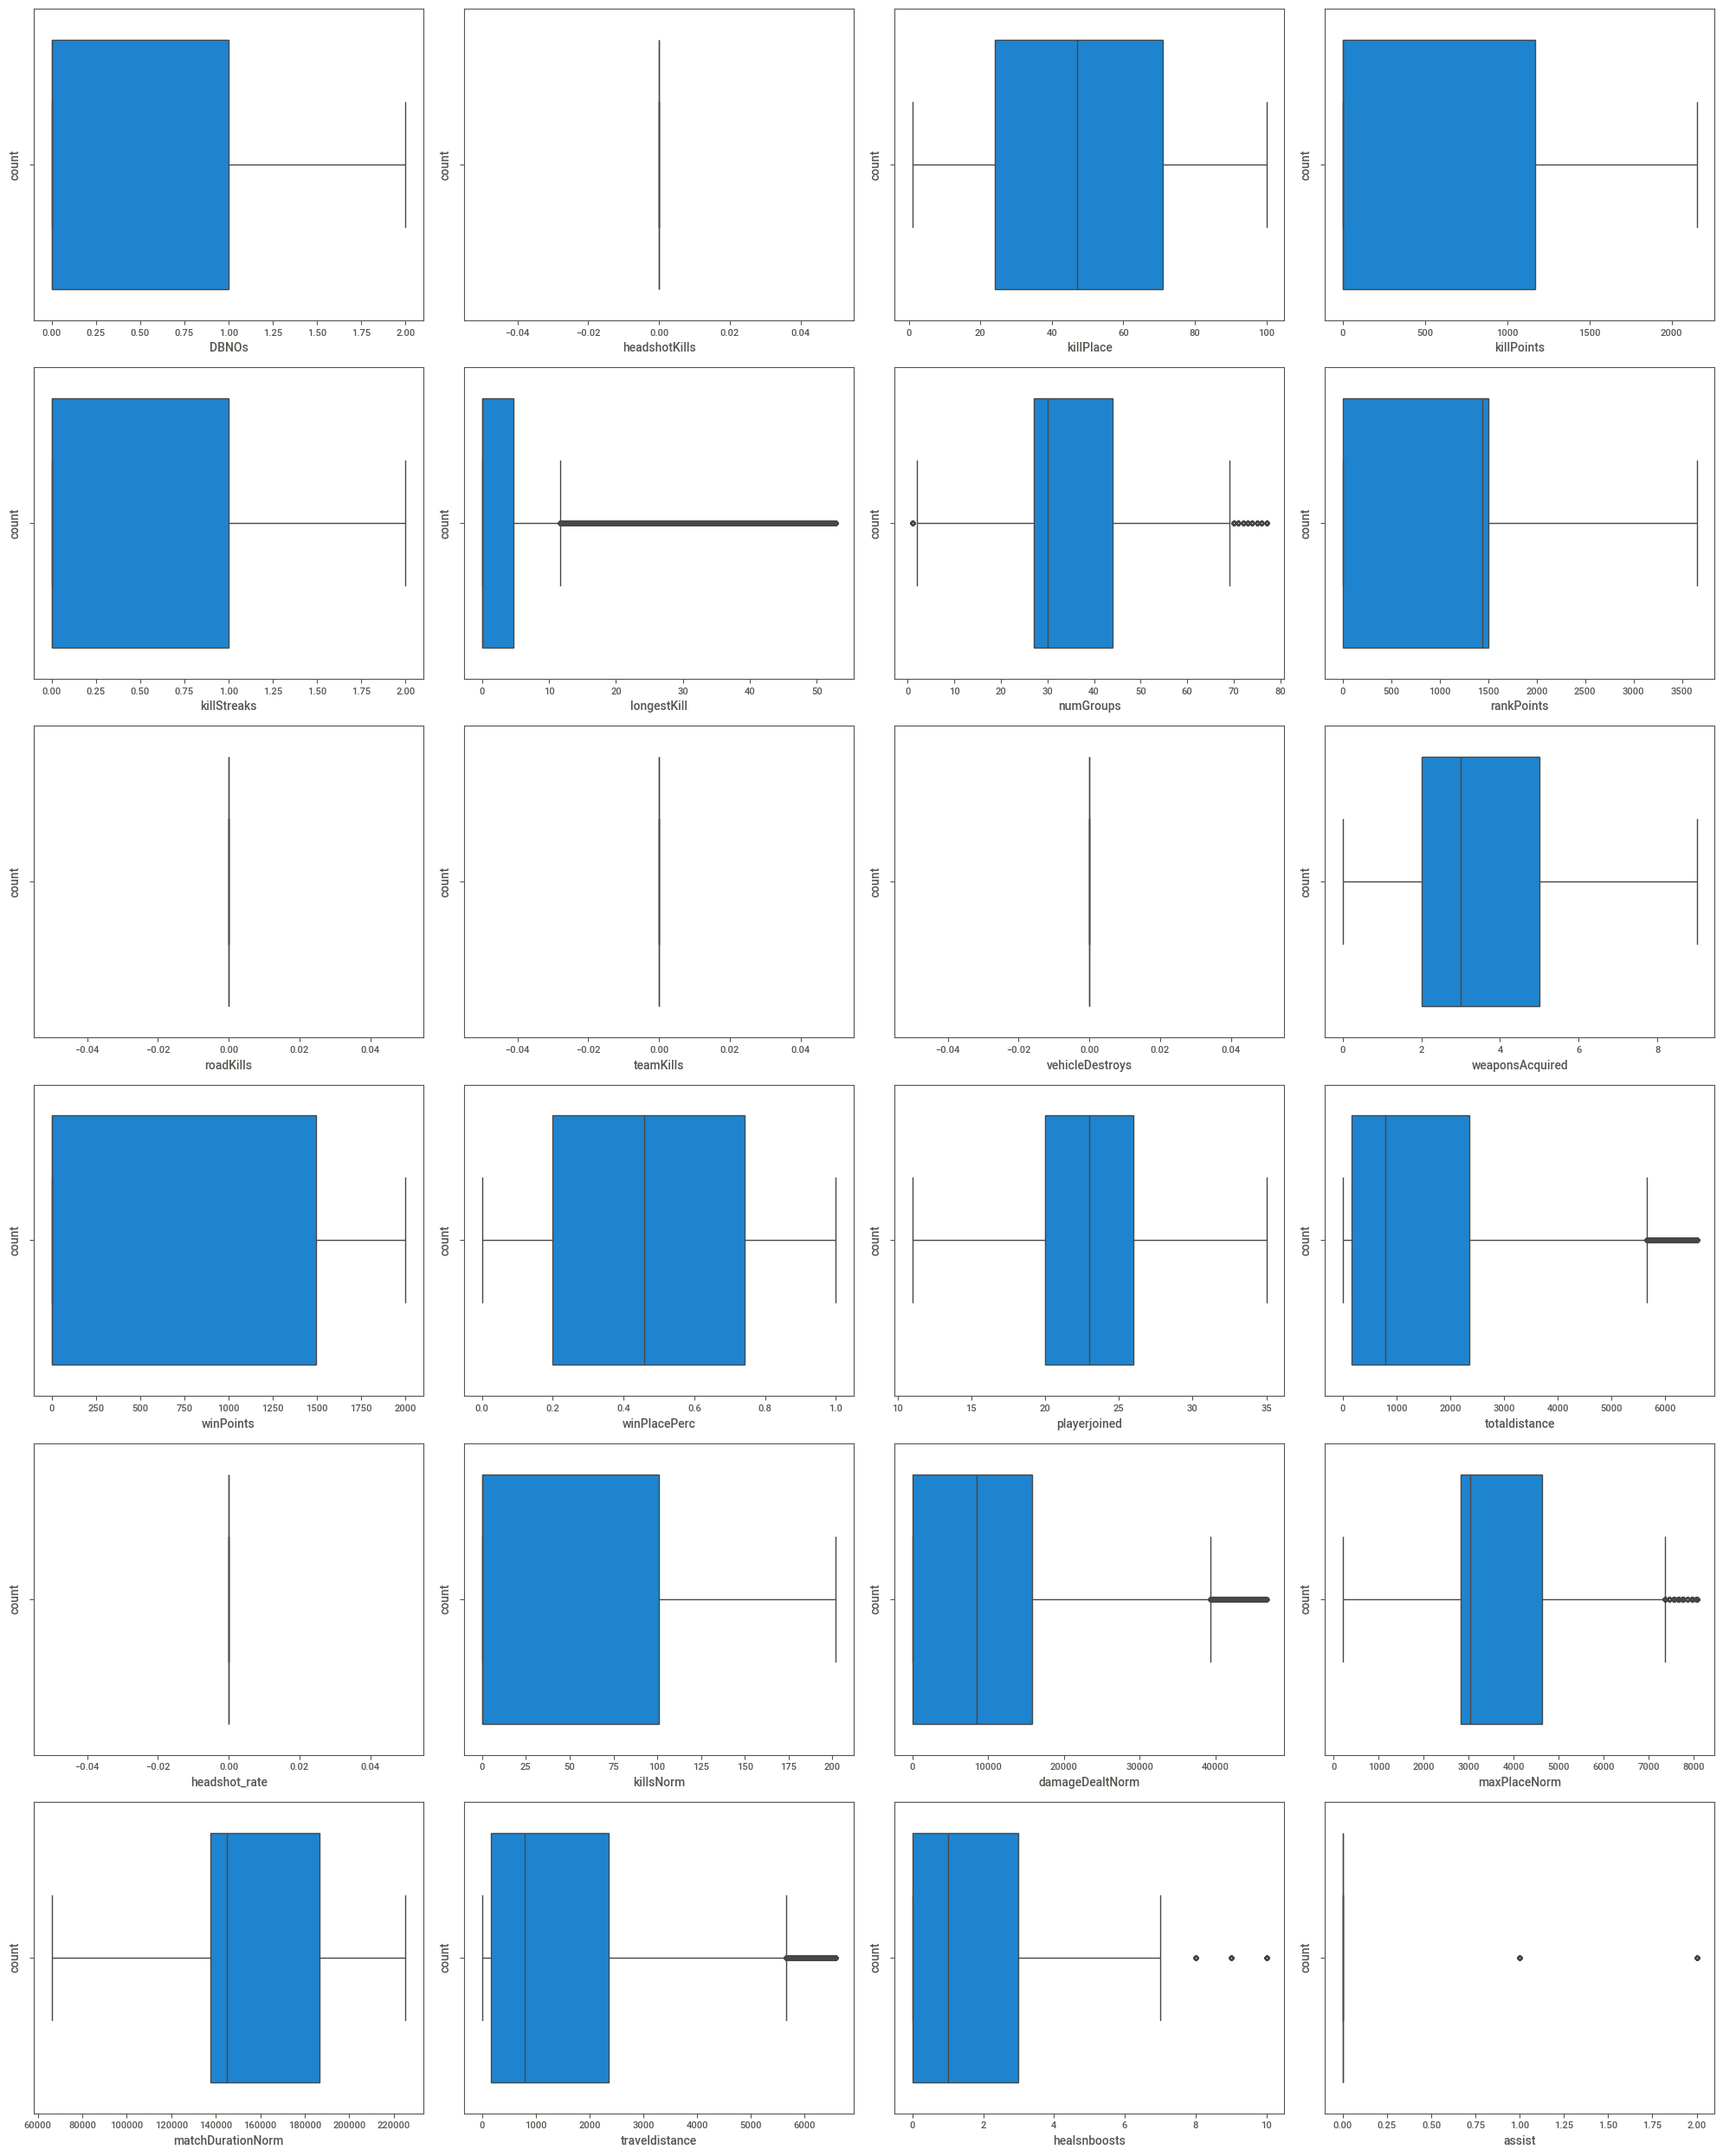

In [126]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 25:
        ax = plt.subplot(6, 4, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

In [128]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [130]:
features = x.columns

# Data Scaling

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#!pip install catboost
#import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =scaler.fit_transform(x)

In [137]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [139]:
x

array([[-0.61747574,  0.        ,  0.44894817, ..., -0.73349049,
        -0.69944068, -0.50322904],
       [-0.61747574,  0.        ,  0.33970252, ...,  0.0206862 ,
        -0.69944068, -0.50322904],
       [-0.61747574,  0.        , -0.02444964, ..., -0.78564376,
        -0.69944068,  1.26990645],
       ...,
       [ 0.93042369,  0.        , -1.00766046, ...,  1.34208365,
         1.24258367, -0.50322904],
       [ 0.93042369,  0.        , -0.20652572, ..., -0.83616958,
        -0.69944068, -0.50322904],
       [ 0.93042369,  0.        , -0.67992352, ...,  0.71121769,
         0.07736906,  3.04304194]])

In [141]:
x=pd.DataFrame(x,columns=['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playerjoined', 'totaldistance', 'headshot_rate', 'killsNorm', 'damageDealtNorm', 'maxPlaceNorm',
       'matchDurationNorm', 'traveldistance', 'healsnboosts', 'assist'])

In [143]:
x

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,-0.617476,0.0,0.448948,1.170554,-0.776192,-0.485495,0.781206,-0.803460,-1.210373,0.0,...,-0.248986,-0.733490,0.0,-0.623386,-0.943236,-0.675983,-1.068506,-0.733490,-0.699441,-0.503229
1,-0.617476,0.0,0.339703,-0.806119,-0.776192,-0.485495,0.781206,-0.915636,0.805338,0.0,...,0.951700,0.020686,0.0,-0.623386,-0.099120,-0.895296,0.762087,0.020686,-0.699441,-0.503229
2,-0.617476,0.0,-0.024450,-0.806119,-0.776192,-0.485495,-1.660143,1.552235,0.814840,0.0,...,0.951700,-0.785644,0.0,-0.623386,-0.315709,1.718300,-1.024326,-0.785644,-0.699441,1.269906
3,-0.617476,0.0,0.995176,-0.806119,-0.776192,-0.485495,0.781206,-0.354756,0.702177,0.0,...,0.471426,-0.759944,0.0,-0.623386,-0.639563,-0.350127,-0.563964,-0.759944,-0.699441,-0.503229
4,-0.617476,0.0,-0.097280,-0.806119,0.759164,-0.485495,0.405614,-0.354756,0.908499,0.0,...,-0.489124,-0.856051,0.0,0.858754,-0.019852,-0.457102,-0.608476,-0.856051,-0.699441,-0.503229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046000,-0.617476,0.0,0.376118,1.842718,-0.776192,-0.485495,0.781206,-0.691284,-1.210373,0.0,...,-0.729261,-0.174131,0.0,-0.623386,-0.197068,-0.566402,-0.452139,-0.174131,-0.699441,1.269906
1046001,-0.617476,0.0,-0.752754,-0.806119,0.759164,-0.485495,0.405614,-0.354756,0.870492,0.0,...,-0.008849,1.198191,0.0,0.858460,0.760992,-0.457102,-0.761423,1.198191,1.242584,-0.503229
1046002,0.930424,0.0,-1.007660,1.119584,0.759164,-0.134849,0.781206,-0.803460,-1.210373,0.0,...,-0.969398,1.342084,0.0,0.859048,0.733038,-0.893048,0.985703,1.342084,1.242584,-0.503229
1046003,0.930424,0.0,-0.206526,-0.806119,0.759164,0.739589,0.593410,-0.691284,0.873207,0.0,...,-0.969398,-0.836170,0.0,0.859048,-0.019669,-0.675075,-1.051412,-0.836170,-0.699441,-0.503229


In [145]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
1048570    0.4643
1048571    0.9381
1048572    0.8400
1048573    0.0370
1048574    0.4074
Name: winPlacePerc, Length: 1046005, dtype: float64

# Data Spliting

In [148]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 20)

In [150]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(732203, 24) (732203,)
(313802, 24) (313802,)


In [152]:

X_train

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
394679,-0.617476,0.0,0.011966,-0.806119,-0.776192,-0.485495,0.217818,-0.354756,0.827056,0.0,...,0.711563,-0.391415,0.0,-0.623386,-0.803782,-0.457102,1.167578,-0.391415,0.077369,-0.503229
348843,-0.617476,0.0,0.776685,-0.806119,-0.776192,-0.485495,-1.472347,1.327883,0.761902,0.0,...,0.711563,-0.584445,0.0,-0.623386,-0.305402,1.392108,1.190932,-0.584445,2.407798,1.269906
60779,-0.617476,0.0,0.448948,1.570348,-0.776192,-0.485495,0.781206,-0.691284,-1.210373,0.0,...,-0.248986,-0.442061,0.0,-0.623386,0.367839,-0.675983,-0.601238,-0.442061,-0.699441,-0.503229
644098,-0.617476,0.0,0.958761,-0.806119,-0.776192,-0.485495,0.405614,-0.354756,1.065955,0.0,...,-1.209535,-0.813417,0.0,-0.623386,-0.585503,-0.457102,1.153915,-0.813417,0.077369,-0.503229
739696,-0.617476,0.0,0.594609,-0.806119,-0.776192,-0.485495,0.217818,-0.354756,0.820269,0.0,...,0.711563,-0.742853,0.0,-0.623386,-0.943236,-0.457102,1.101408,-0.742853,0.077369,-0.503229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744348,0.930424,0.0,-1.116906,0.786688,0.759164,1.078923,0.781206,-1.700868,-1.210373,0.0,...,-2.650359,3.090160,0.0,0.860078,0.214797,-1.545452,1.181651,3.090160,0.465774,1.269906
285919,-0.617476,0.0,-1.335397,-0.806119,0.759164,2.229180,0.405614,-0.354756,0.813482,0.0,...,-1.209535,2.879034,0.0,-0.623386,1.757542,-0.457102,0.982516,2.879034,2.019393,-0.503229
37135,2.478323,0.0,-1.371813,1.337799,2.294519,-0.485495,-1.472347,1.215707,-1.210373,0.0,...,-0.008849,1.854191,0.0,-0.623386,2.524305,1.393633,0.928361,1.854191,-0.311036,-0.503229
879066,-0.617476,0.0,0.521779,-0.806119,-0.776192,-0.485495,0.781206,-0.466932,0.818912,0.0,...,0.951700,-0.464417,0.0,-0.623386,-0.943236,-0.568597,-0.981514,-0.464417,0.077369,-0.503229


In [154]:
y_train

395614     0.8421
349659     0.3478
60916      0.4074
645653     0.2784
741495     0.4388
            ...  
746165     0.5263
286587     0.7174
37210      0.7826
881212     0.5000
1034061    0.0957
Name: winPlacePerc, Length: 732203, dtype: float64

# Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.

# Model Building

In [158]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model Evaluation

In [161]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [163]:
models = {
    'LinearRegression': LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.1450
- Mean Absolute Error: 0.1067
- R2 Score: 0.7775
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1448
- Mean Absolute Error: 0.1067
- R2 Score: 0.7776


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0008
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1234
- Mean Absolute Error: 0.0869
- R2 Score: 0.8385


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0840
- Mean Absolute Error: 0.0610
- R2 Score: 0.9254
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0858
- Mean Absolute Error: 0.0619
- R2 Score: 0.9220


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1389
- Mean Absolute Error: 0.1056
- R2 Score: 0.7960
------------

# **Best 2 Predictive models to predict the win probability of the Pubg match are:- XGBRegressor(accuracy-92%) and GradientBoostingRegressor (accuracy-88%)**

# Important Features

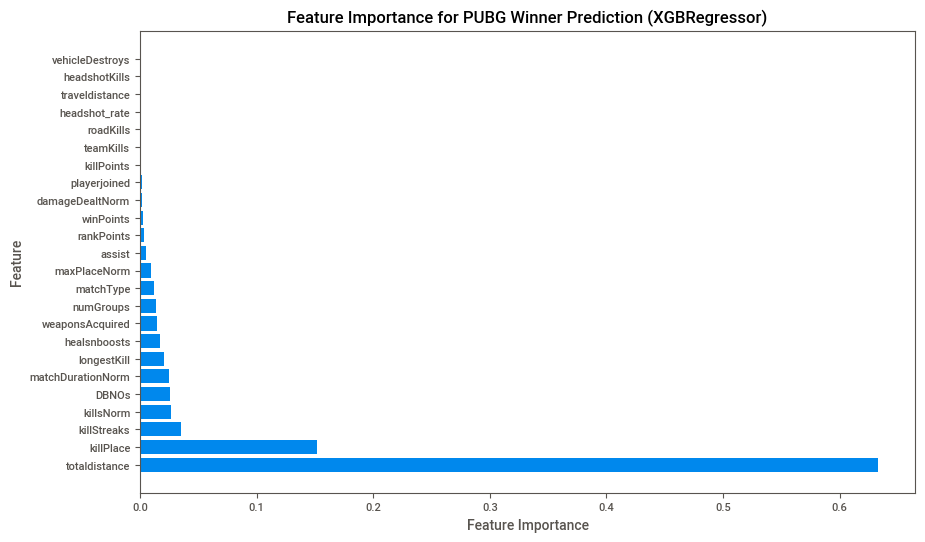

In [170]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_
feature_names = x.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for PUBG Winner Prediction (XGBRegressor)')
plt.show()


**Important factors affecting the win probability of the pubg game, as shown in the plot are:- totaldistance, killplace, killStreaks and healboosts**

# Model Comparison Report

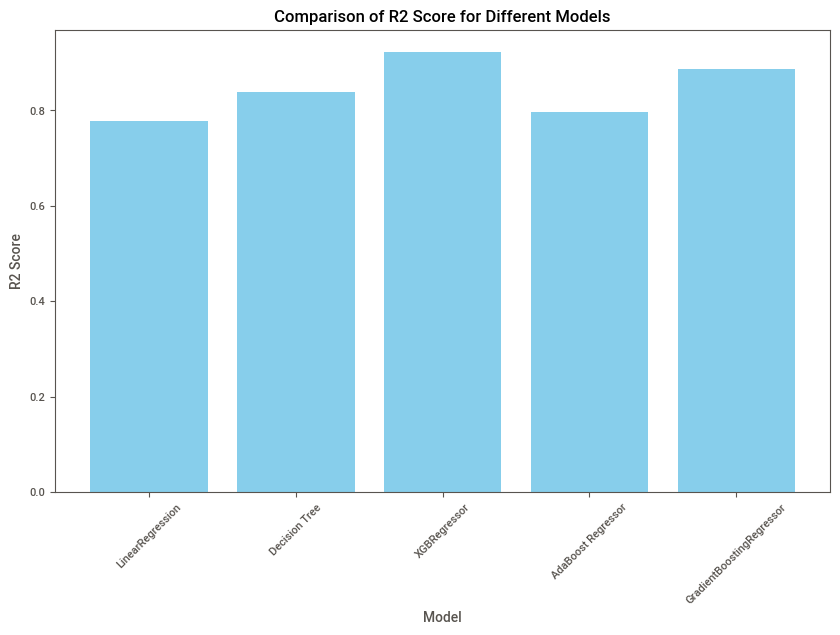

In [172]:
plt.figure(figsize=(10, 6))
plt.bar(model_list, r2_list, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score for Different Models')
plt.xticks(rotation=45)
plt.show()

In [174]:
# Create a DataFrame to store the evaluation results
evaluation_df = pd.DataFrame({'Model': model_list, 'R2 Score': r2_list})

# Print the DataFrame
print(evaluation_df)

# If you want to display the DataFrame as a table in a Jupyter Notebook or Google Colab, you can simply do:
display(evaluation_df)

                       Model  R2 Score
0           LinearRegression  0.777606
1              Decision Tree  0.838476
2               XGBRegressor  0.921957
3         AdaBoost Regressor  0.795909
4  GradientBoostingRegressor  0.885999


,Model,R2 Score
0,LinearRegression,0.777606
1,Decision Tree,0.838476
2,XGBRegressor,0.921957
3,AdaBoost Regressor,0.795909
4,GradientBoostingRegressor,0.885999


# Conclusion

- The analysis highlights key factors influencing win probability in PUBG.

- The Random Forest model accurately predicts the win probability, providing actionable insights for improving gameplay strategy.